 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 05 : Dynamic Time Warping (DTW)  </b>


We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<h4> <b> Part (a). Dynamic Time Warping(DTW): </b>  In this part you need to try and implement the basic sequence matching algorithm DTW. </h4>
<dt> <h4> Two sequences A and B can be compared using a euclidean distance
<center> $ A = (x_1, x_2, x_3, ..., x_M)$ </center> <br>
<center> $ B = (y_1, y_2, y_3, ..., y_N)$ </center> <br> </h4> </dt>
<dt> <h4> Now the distance is computed as </h4> </dt>
<center> $ D(A,B) = \frac{1}{N} \sum_1^N || x_n - y_n||$</center> </h4> </dt>
<dt> <h4> There are two main issues </h4> </dt>
<dd> <h4> 1. What if the sequences are not aligned in time ?</h4> </dt>
<dd> <h4> 2. What if the sequences have varying lengths ?</h4> </dt>
<dt> <h4> The non-linear alignment path produces a better similarity measure. </h4> </dt>

![picture](https://drive.google.com/uc?export=view&id=1XWTK0XUpDIuf-5nbe7pk6uPx29-22zF0)

<dt> <h4> <b> Algorithm </b> </h4> </dt>
<dt> <h4>  1. Compute distance matrix $D_{M\times N}$ between A and B </h4> </dt>
<dt> <h4>  2. Compute accumulated distance matrix $C_{M\times N}$ between A and B </h4> </dt>
<dd> <h4>  ~ Initialize: C(0,0) = D(0,0) </h4> </dd>
<dd> <h4>  ~ for i=1,2,..M and j=1,2,...N  <dd> <h4>  ~ Update C <dd> <h4> C(i,j) = D(i,j) + min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> <dd> <h4>  ~ Store the best Path <dd> <h4> P(i,j) = arg min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> </h4> </dd>
<dt> <h4>  3. C(M,N) gives the similarity measure </h4> </dt>
<dt> <h4>  4. Backtrack the best alignment path <br> <center> $ q_T^* = (M,N) \\ q_{t-1}^* = P(q_t^*) \qquad t = T,T-1,....1$ </center></h4> </dt>
<dt> <h4> <b> Programming question </b> </h4> </dt>
<dt> <h4>  1. Consider the following two sequences $A = [4,3,7,0,2,6,5]$, and $B = [3,7,1,6,1,5,4,4]$. Write a DTW algorithm to find the optimal similarity/distance between them. </h4> </dt>
<dd> <h4> - Compute the distance matrix between the two sequences </dd> </h4>
<dd> <h4> - Compute the accumulative distance matrix </dd> </h4>
<dd> <h4> - Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance </dd> </h4>
<dd> <h4> - Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes </dd> </h4>



20.0
[[7 6]
 [6 6]
 [5 5]
 [4 4]
 [4 3]
 [3 2]
 [2 1]
 [1 0]
 [0 0]]


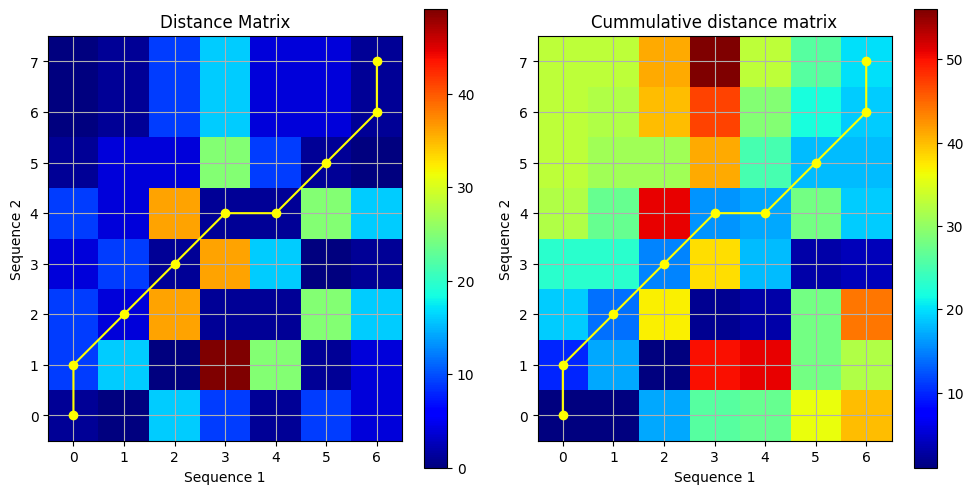

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two sequences
###########################################################
def DTW(sequence1,sequence2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################
    M=len(sequence2)
    N=len(sequence1)

    D=np.zeros((M,N))

    for i in range(M):
      for j in range(N):
        dist=sequence1[j]-sequence2[i]
        dist=dist*dist

        D[i,j]=dist

    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix

    DTW_cumulate_Matrix =np.zeros((M,N))    #Cummulative distance matrix
    #Iterate through the sequence of points in sequences and compute the distance between the sequences.

    DTW_cumulate_Matrix[0,0]=D[0,0]

    for i in range(0,len(sequence2),1):      #you can start from 1
        for j in range(0,len(sequence1),1):
            current_distance =  D[i,j]            #Compute the distance between the two points

            if (i==0 and j==0):
              continue

            elif (i==0 and j!=0):
              min_dist=min([ DTW_cumulate_Matrix[i,j-1]])

            elif (i!=0 and j==0):
              min_dist=min([ DTW_cumulate_Matrix[i-1,j]])

            else:
              min_dist=min([ DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i,j-1],DTW_cumulate_Matrix[i-1,j-1]])

            DTW_cumulate_Matrix[i,j]=current_distance+min_dist

    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    opt_distance = 0.0
    i =M  # length of the sequence2
    j =N  # length of the sequence1

    path=[]
    iter=0

    while i!=0 or j!=0: #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])

        if (i==M and j==N and iter==0):
          i=M-1
          j=N-1
          point=[i,j]

        else:
          if i==0:
            x=i
            y=j-1

          elif j==0:
            x=i-1
            y=j

          else:
            value=DTW_cumulate_Matrix[i-1,j-1]

            if value>DTW_cumulate_Matrix[i-1,j]:
              value=DTW_cumulate_Matrix[i-1,j]
              x=i-1
              y=j

            if value>DTW_cumulate_Matrix[i,j-1]:
              value=DTW_cumulate_Matrix[i,j-1]
              x=i
              y=j-1

          i=x
          j=y
          point=[i,j]


        # Add the current indexes distance
        opt_distance = opt_distance + D[i,j]               #Compute the distance between the points sequence1[i] and sequence2[j]


        #Store the required indexes to obtain the optimal path
        path.append(point)

        x=i-1
        y=j-1
        iter=iter+1

    path=np.array(path)

    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################

    return opt_distance,path,D,DTW_cumulate_Matrix


def plotDTWpath(sequence1,sequence2):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################

    #Compute distance and cumulative distance between the given templates
    #Obtain the optimal path using "DTW" function

    opt_distance,path,D,C =DTW(sequence1,sequence2)

    print(opt_distance)
    print(path)
    #print(D)
    #print(C)

    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)

    plt.imshow(D,cmap="jet", origin='lower')
    plt.title('Distance Matrix')
    plt.xlabel('Sequence 1')
    plt.ylabel('Sequence 2')
    plt.colorbar()
    plt.plot([point[1] for point in path], [point[0] for point in path], color='yellow', marker='o')
    plt.grid(visible=True)

    plt.subplot(1,2,2)

    plt.imshow(C,cmap="jet", origin='lower')
    plt.title('Cummulative distance matrix')
    plt.xlabel('Sequence 1')
    plt.ylabel('Sequence 2')
    plt.colorbar()
    plt.plot([point[1] for point in path], [point[0] for point in path], color='yellow', marker='o')
    plt.grid(visible=True)

    plt.tight_layout()
    plt.show()



A=np.array([4,3,7,0,2,6,5])

B=np.array([3,7,1,6,1,5,4,4])

plotDTWpath(A,B)

<b> Report your observations </b>

1.The optimal distance is 20

2.The optimal path is [ [7 6] [6 6] [5 5] [4 4] [4 3] [3 2] [2 1] [1 0] [0 0]]



<dt> <h4> <b> Part (b): </b> In this part of the assignment, we expect you to build the Isolated digit recognition system with the help of the above written DTW algorithm. </dt> </h4>

![picture](https://drive.google.com/uc?export=view&id=1nGtWwbDg8PJBNwck_dUt2mmsCBshrGYc)



<dt> <h4> 1. Record one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes. </dt> </h4>
<dt> <h4> 2. Record three further repetitions of the same digits (Isolated words) as test data. </dt> </h4>  
<dt> <h4> 3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are provided. Please use them to obtain the templates of the speech signals. </dt> </h4>  
<dt> <h4> 4. Write an algorithm to perform isolated digit recognition with the help of the DTW codes. </dt> </h4>
<dt> <h4> 5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   </dt> </h4>
<dt> <h4> 6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. </dt> </h4>
<dt> <h4> 7. Create a confusion matrix and report the most confusing digits. </dt> </h4>


**Module to record the voice in online mode**

In [ ]:
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os
from IPython.display import Audio

#### Please comment below line, if you already uploaded the 'recording.wav' in '/content/'
!rm recording.wav

#### You can run this module in the loop to record more repetitions of the digits.
if os.path.isfile('recording.wav'):
    print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
else:
    print("Recording the digits")
    wav = record(3) #It will record three seconds of your speech. You can change the duration.
    wav = wav.set_frame_rate(16000)
    sig=wav.get_array_of_samples()
    samples=np.array(sig).T.astype(np.float32)
    fp_arr = np.array(samples).T.astype(np.float32)
    fp_arr /= np.iinfo(sig.typecode).max
    scipy.io.wavfile.write('recording.wav', 16000, fp_arr) #Please change the name.


wn = Audio('recording.wav', autoplay=True)
#display(wn)

rm: cannot remove 'recording.wav': No such file or directory
Recording the digits


<IPython.core.display.Javascript object>

**Recording from google drive**

In [ ]:
from google.colab import drive
import os
import shutil
from IPython.display import Audio, display
import scipy.io.wavfile as wav
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy


drive.mount('/content/drive',force_remount=True)

#Training
datapath = "/content/drive/MyDrive/Programming_assignment_5/Training"
files = os.listdir(datapath)

# Specify the directory in Colab to copy the files to
colab_dir = '/content/'

# Copy audio files to Colab environment
Training=[]
Train_label=[]
for file in files:
    file_path = os.path.join(datapath, file)
    shutil.copy(file_path, colab_dir)
    #print(f"Copied {file} to Colab")
    Train_label.append(int(file[-5]))

    (rate,sig) = wav.read(file_path)
    sig=sig-np.mean(sig)
    mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming, nfft=2048)

    #mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
    mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
    Training.append(mfcc_feat_cmvn)
    #display(Audio(file))

Train_label=np.array(Train_label)

#Testing
Testing=[]
Test_label=[]

datapath = f"/content/drive/MyDrive/Programming_assignment_5/Testing"
files = os.listdir(datapath)

# Specify the directory in Colab to copy the files to
colab_dir = '/content/'
# Copy audio files to Colab environment

for file in files:
    file_path = os.path.join(datapath, file)
    shutil.copy(file_path, colab_dir)
    #print(f"Copied {file} to Colab")
    Test_label.append(int(file[0]))

    (rate,sig) = wav.read(file_path)
    sig=sig-np.mean(sig)
    mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming, nfft=2048)
    #mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
    mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
    Testing.append(mfcc_feat_cmvn)
    #display(Audio(file))

Test_label=np.array(Test_label)

  Preparing metadata (setup.py) ... done
Mounted at /content/drive


**Algorithm to perform isolated digit recognition**

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two templates
###########################################################
def vectorDTW(template1,template2):
    #######################################################
    # Input  : Two templates
    # Output : DTW path and optimal distance
    #######################################################
    M=len(template2)
    N=len(template1)

    D=np.zeros((M,N))

    for i in range(M):
      for j in range(N):
        dist=template1[j]-template2[i]
        dist=np.linalg.norm(dist)

        D[i,j]=dist


    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix

    DTW_cumulate_Matrix =np.zeros((M,N))    #Cummulative distance matrix
    #Iterate through the sequence of points in sequences and compute the distance between the sequences.

    DTW_cumulate_Matrix[0,0]=D[0,0]

    for i in range(0,len(template2),1):      #you can start from 1
        for j in range(0,len(template1),1):
            current_distance =  D[i,j]            #Compute the distance between the two points

            if (i==0 and j==0):
              continue

            elif (i==0 and j!=0):
              min_dist=min([ DTW_cumulate_Matrix[i,j-1]])

            elif (i!=0 and j==0):
              min_dist=min([ DTW_cumulate_Matrix[i-1,j]])

            else:
              min_dist=min([ DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i,j-1],DTW_cumulate_Matrix[i-1,j-1]])

            DTW_cumulate_Matrix[i,j]=current_distance+min_dist


    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################

    opt_distance = 0.0
    i =M  # length of the sequence2
    j =N  # length of the sequence1

    path=[]
    iter=0

    while i!=0 or j!=0: #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])

        if (i==M and j==N and iter==0):
          i=M-1
          j=N-1
          point=[i,j]

        else:
          if i==0:
            x=i
            y=j-1

          elif j==0:
            x=i-1
            y=j

          else:
            value=DTW_cumulate_Matrix[i-1,j-1]

            if value>DTW_cumulate_Matrix[i-1,j]:
              value=DTW_cumulate_Matrix[i-1,j]
              x=i-1
              y=j

            if value>DTW_cumulate_Matrix[i,j-1]:
              value=DTW_cumulate_Matrix[i,j-1]
              x=i
              y=j-1

          i=x
          j=y
          point=[i,j]


        # Add the current indexes distance
        opt_distance = opt_distance + D[i,j]               #Compute the distance between the points sequence1[i] and sequence2[j]


        #Store the required indexes to obtain the optimal path
        path.append(point)

        x=i-1
        y=j-1
        iter=iter+1

    path=np.array(path)

    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################
    return opt_distance,path,D,DTW_cumulate_Matrix

def plotDTWpath1(template1,template2):
    #######################################################
    # Inputs : template1 and template2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################
    opt_distance,path,D,C =vectorDTW(template1,template2)

    print("opt distance is :",opt_distance)
    #print(path)
    #print(D)
    #print(C)

    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)

    plt.imshow(D,cmap="jet", origin='lower')
    plt.title('Distance Matrix')
    plt.xlabel('Sequence 1')
    plt.ylabel('Sequence 2')
    plt.colorbar()
    plt.plot([point[1] for point in path], [point[0] for point in path], color='yellow',linewidth=3.5)
    plt.grid(visible=True)

    plt.subplot(1,2,2)

    plt.imshow(C,cmap="jet", origin='lower')
    plt.title('Cummulative distance matrix')
    plt.xlabel('Sequence 1')
    plt.ylabel('Sequence 2')
    plt.colorbar()
    plt.plot([point[1] for point in path], [point[0] for point in path], color='yellow', linewidth=3.5)
    plt.grid(visible=True)

    plt.tight_layout()
    plt.show()


**Plot the optimal DTW path**

Plot of of digit 0,0 and 0,1
opt distance is : 6231.118332862854


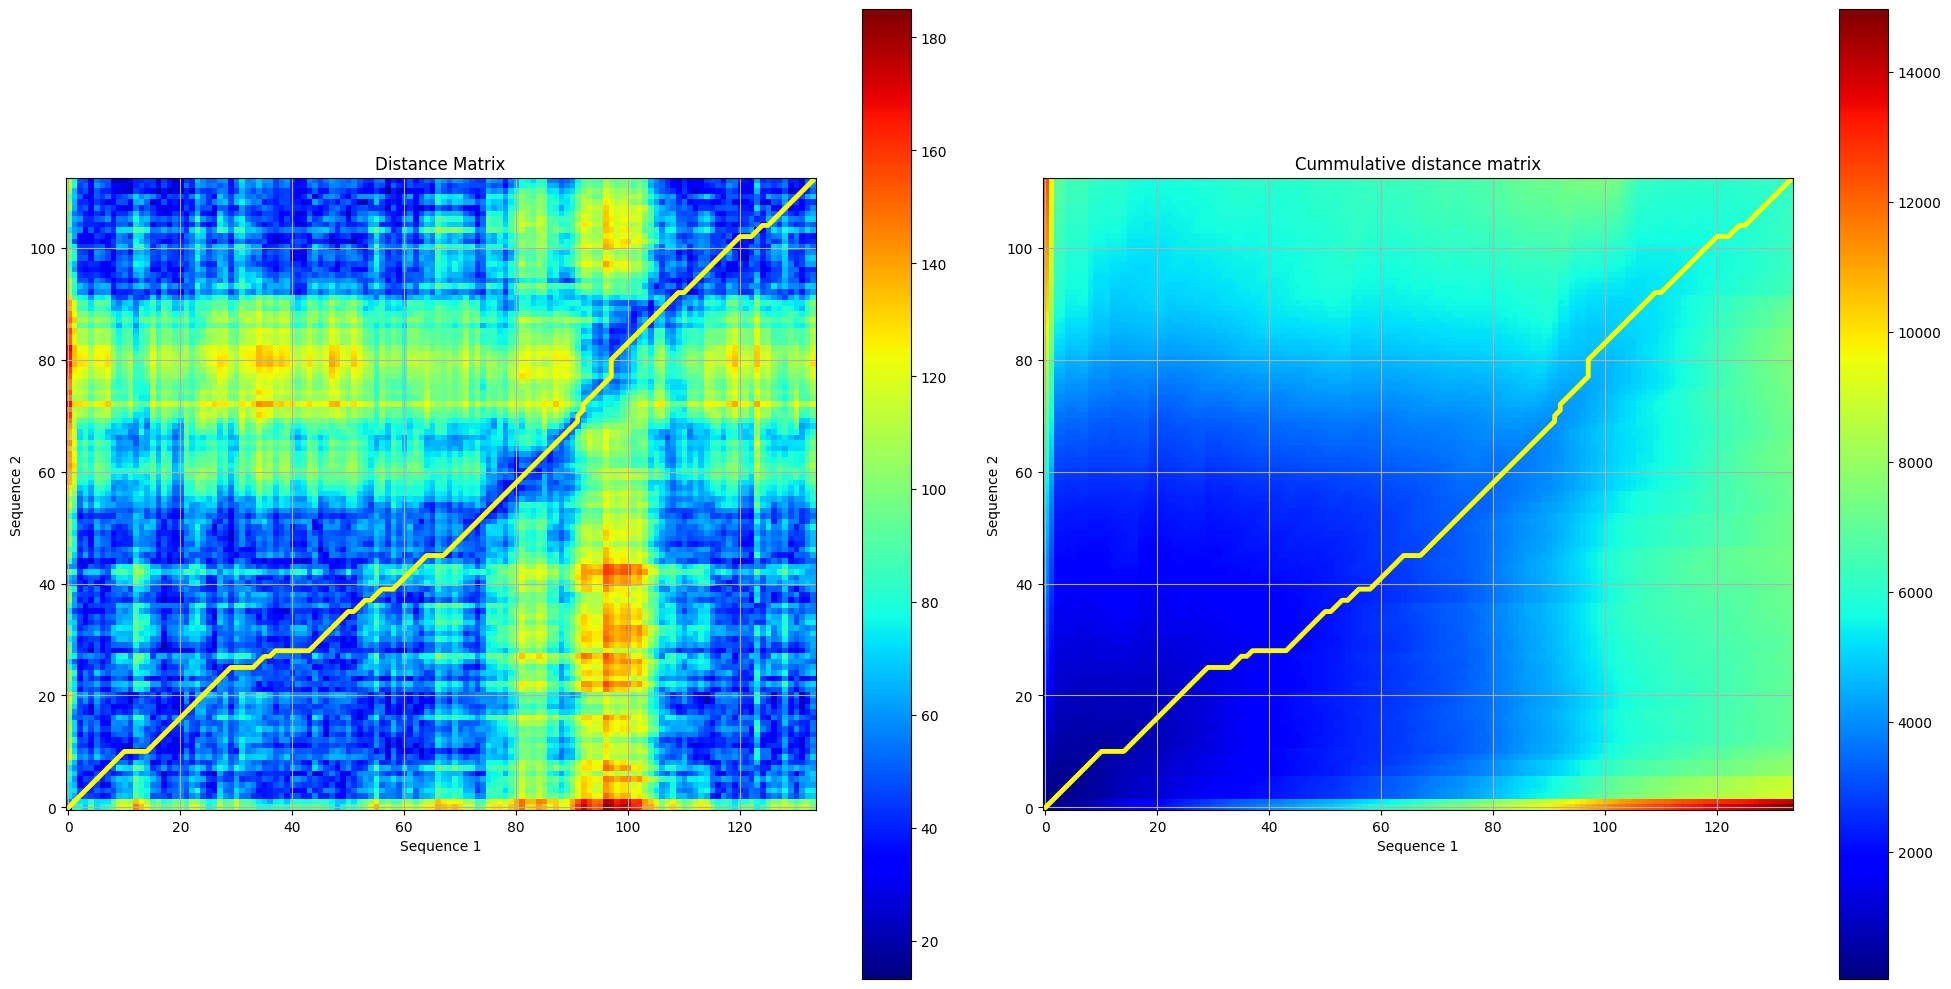

opt distance is : 8633.966705322266


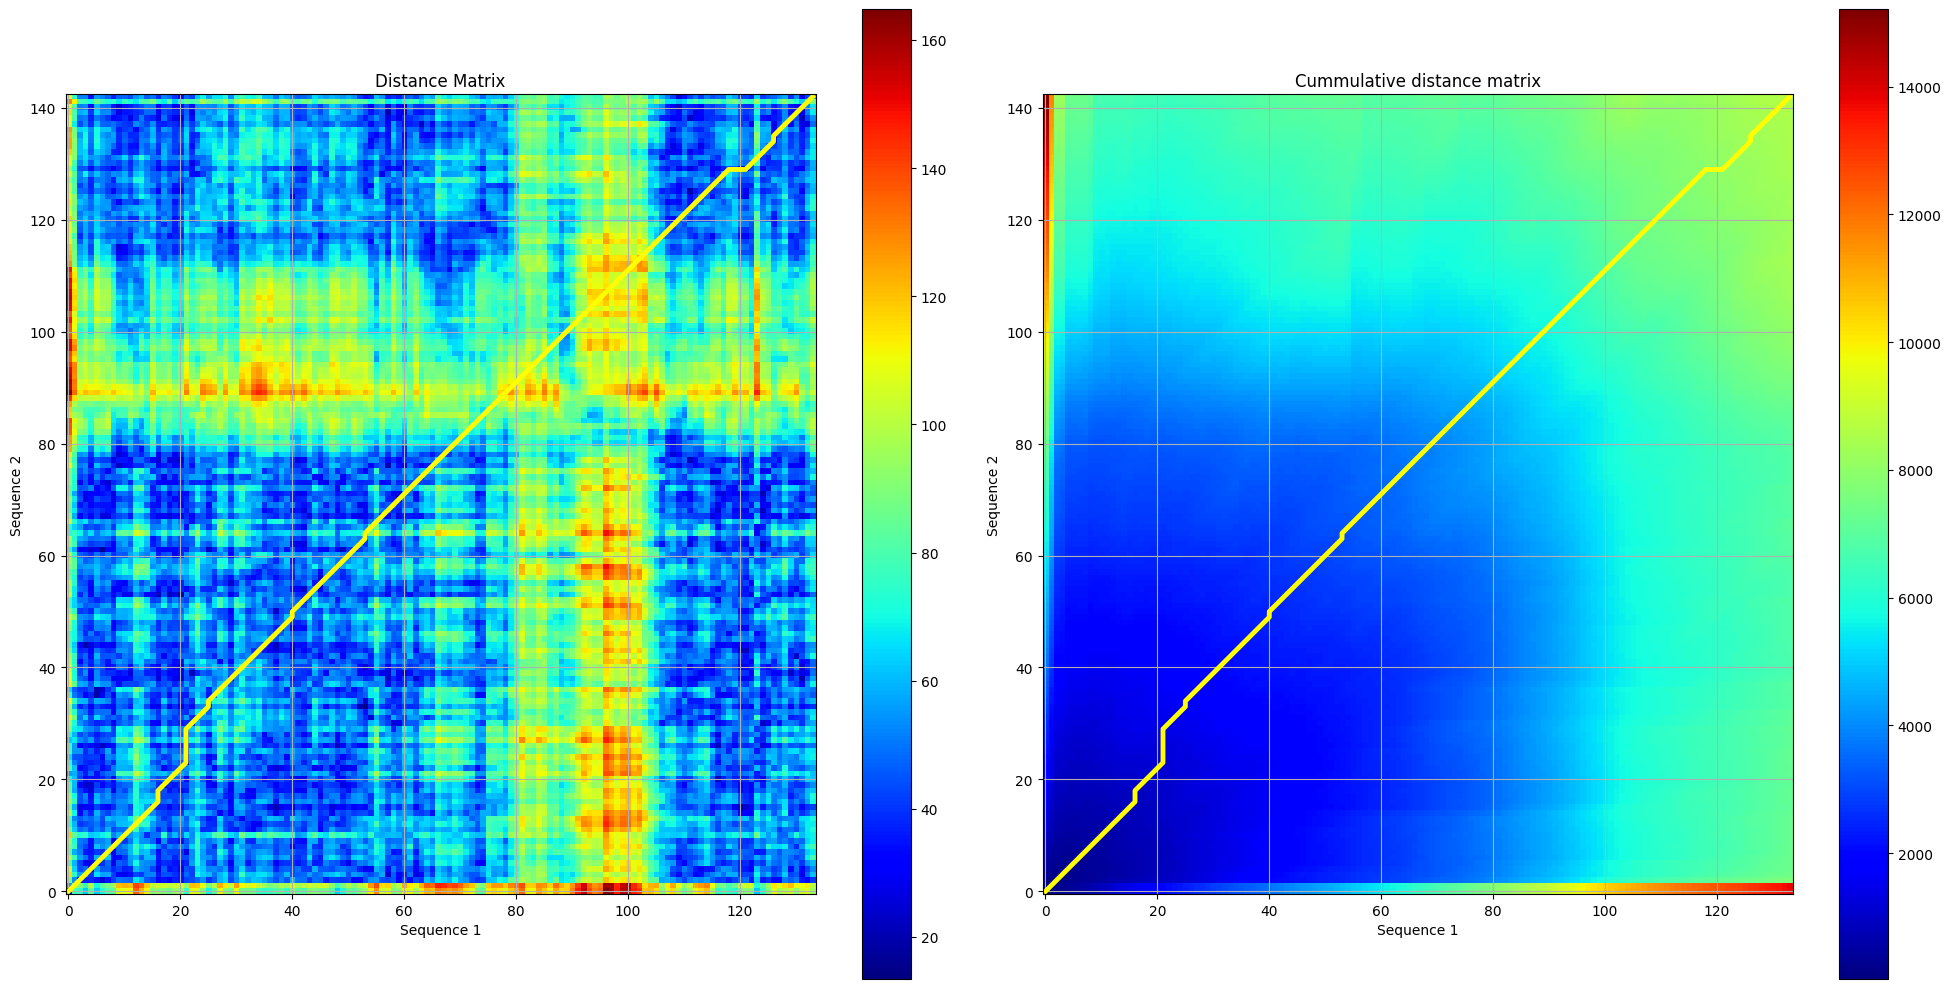


Plot of of digit 1,1 and 1,3
opt distance is : 8013.161623001099


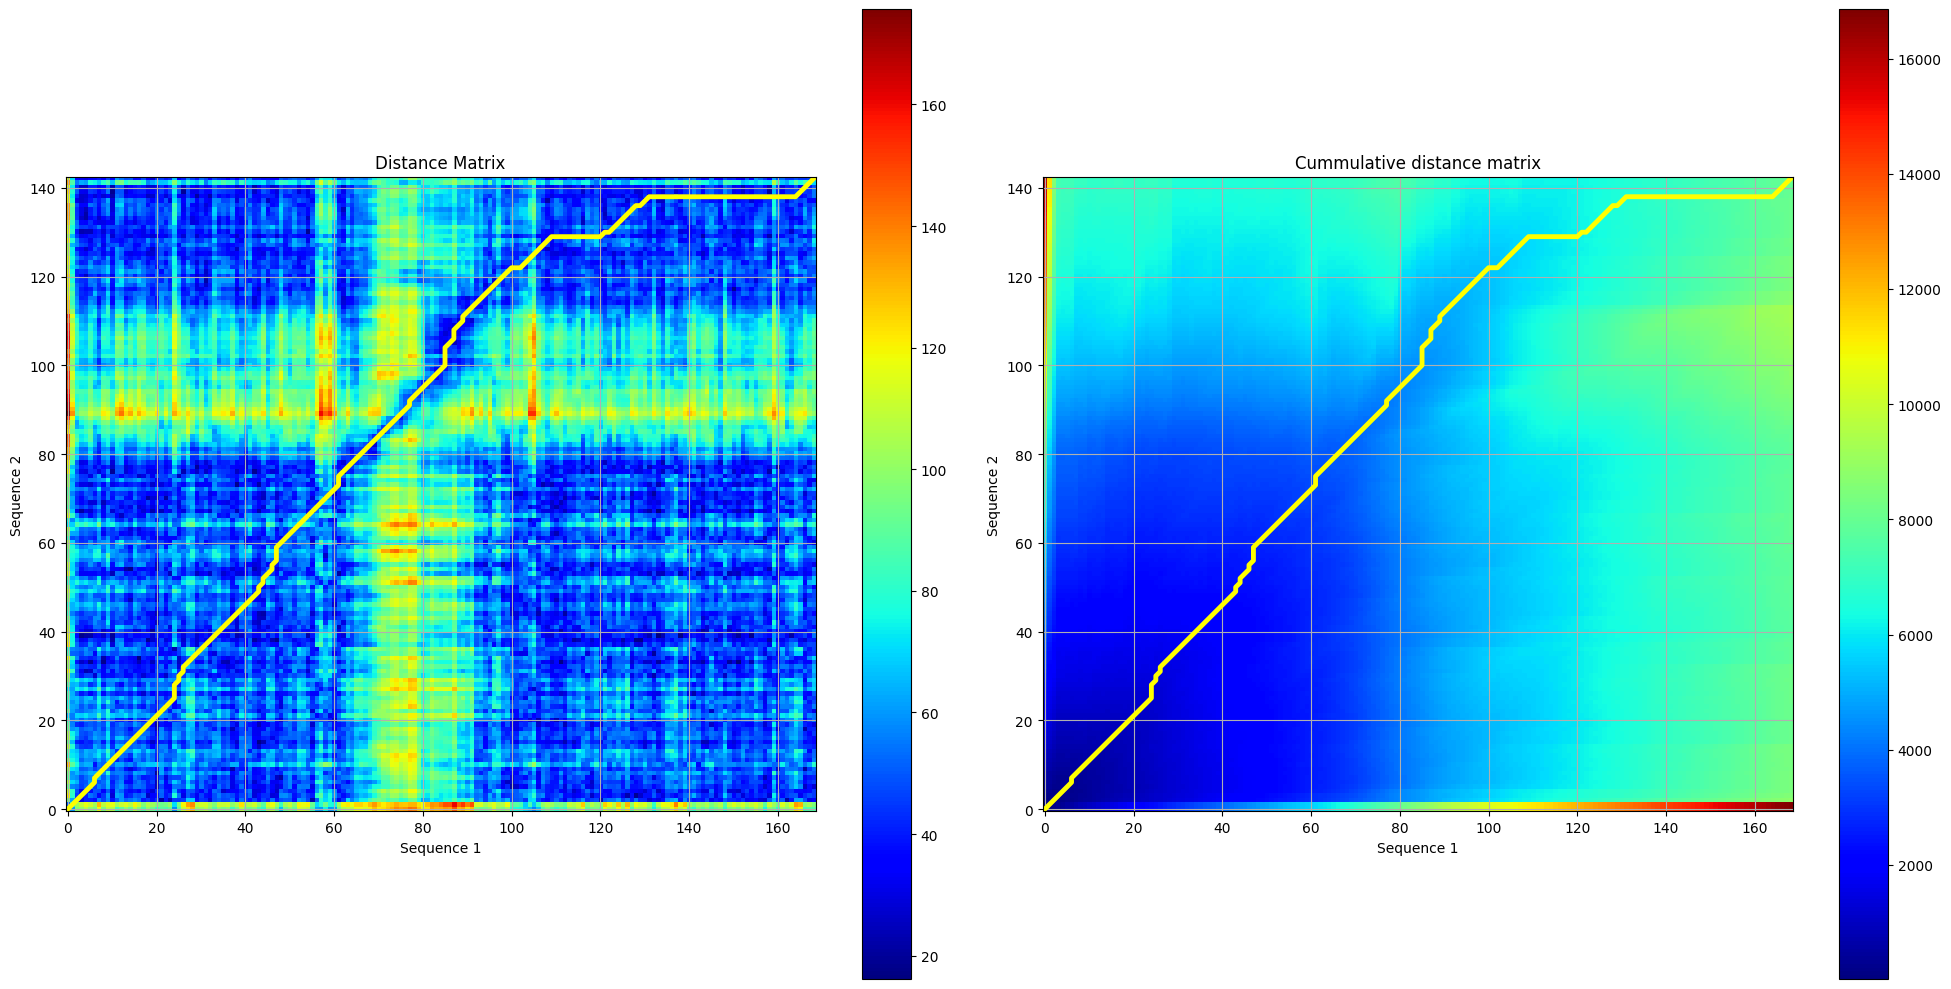

opt distance is : 8051.082029342651


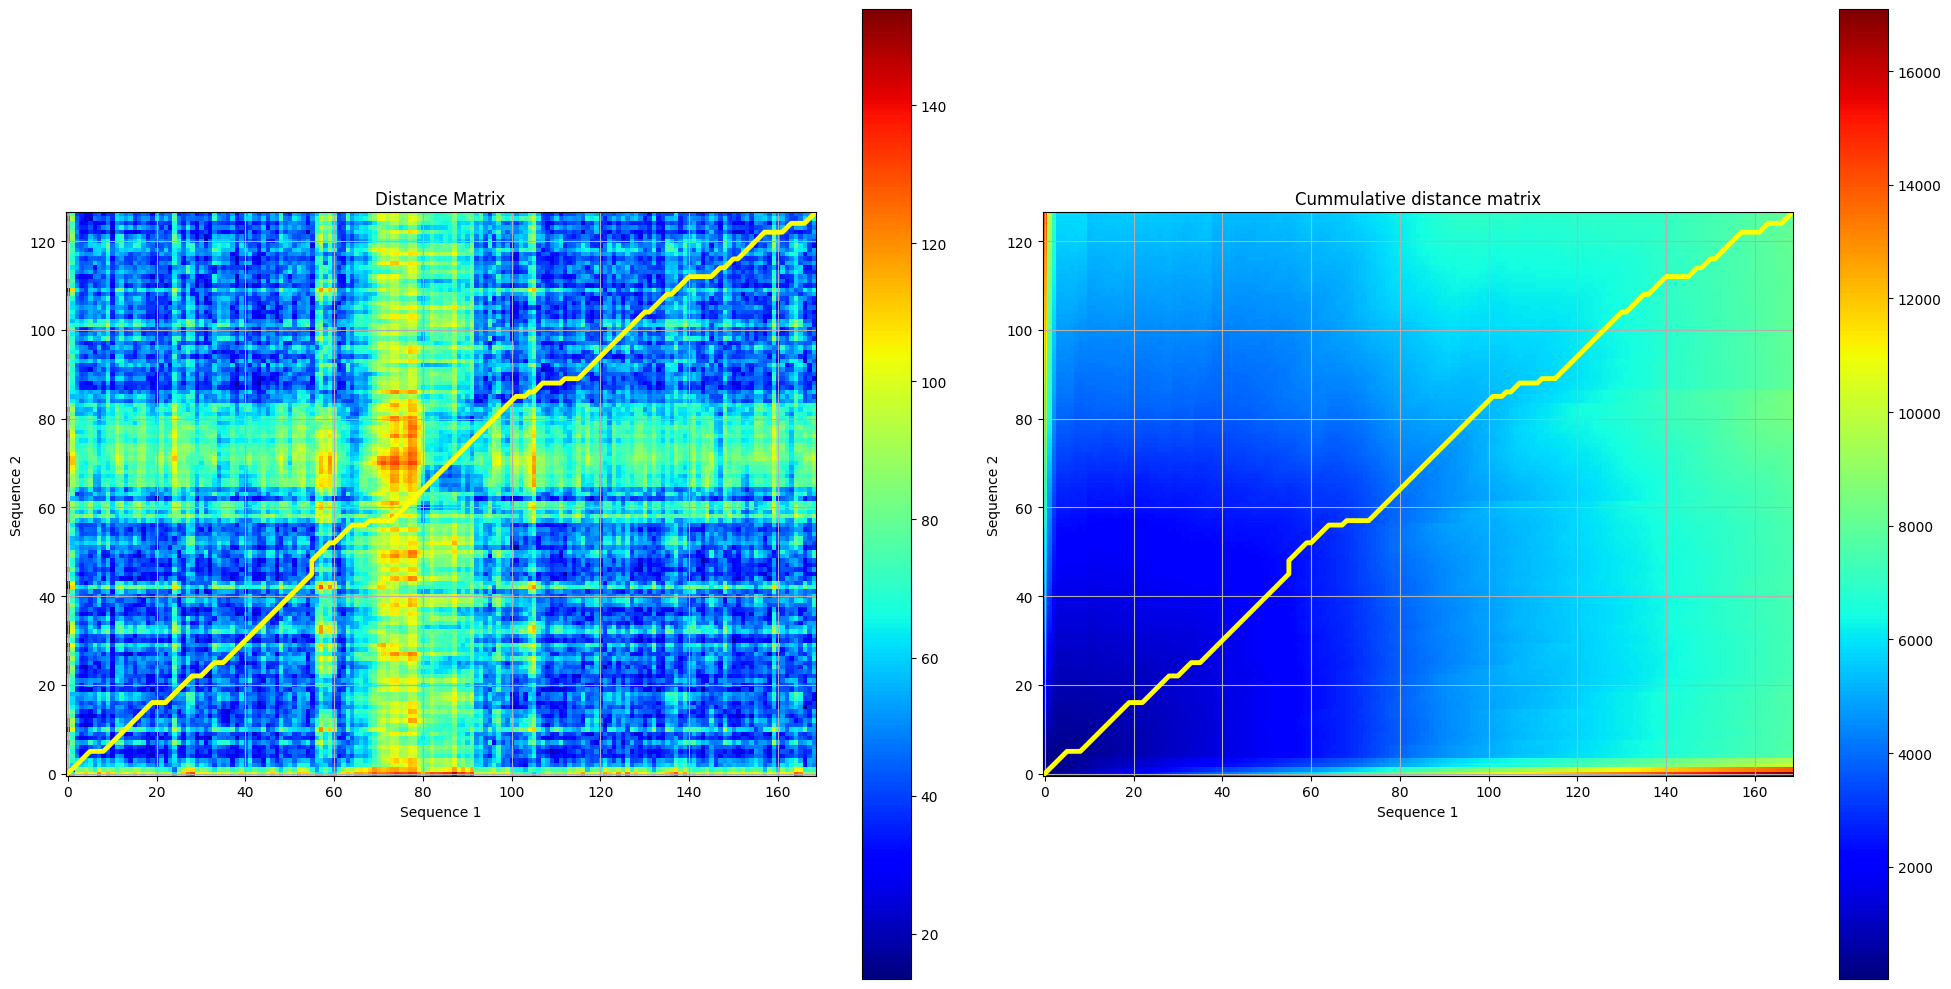


Plot of of digit 8,8 and 8,1
opt distance is : 5454.635103225708


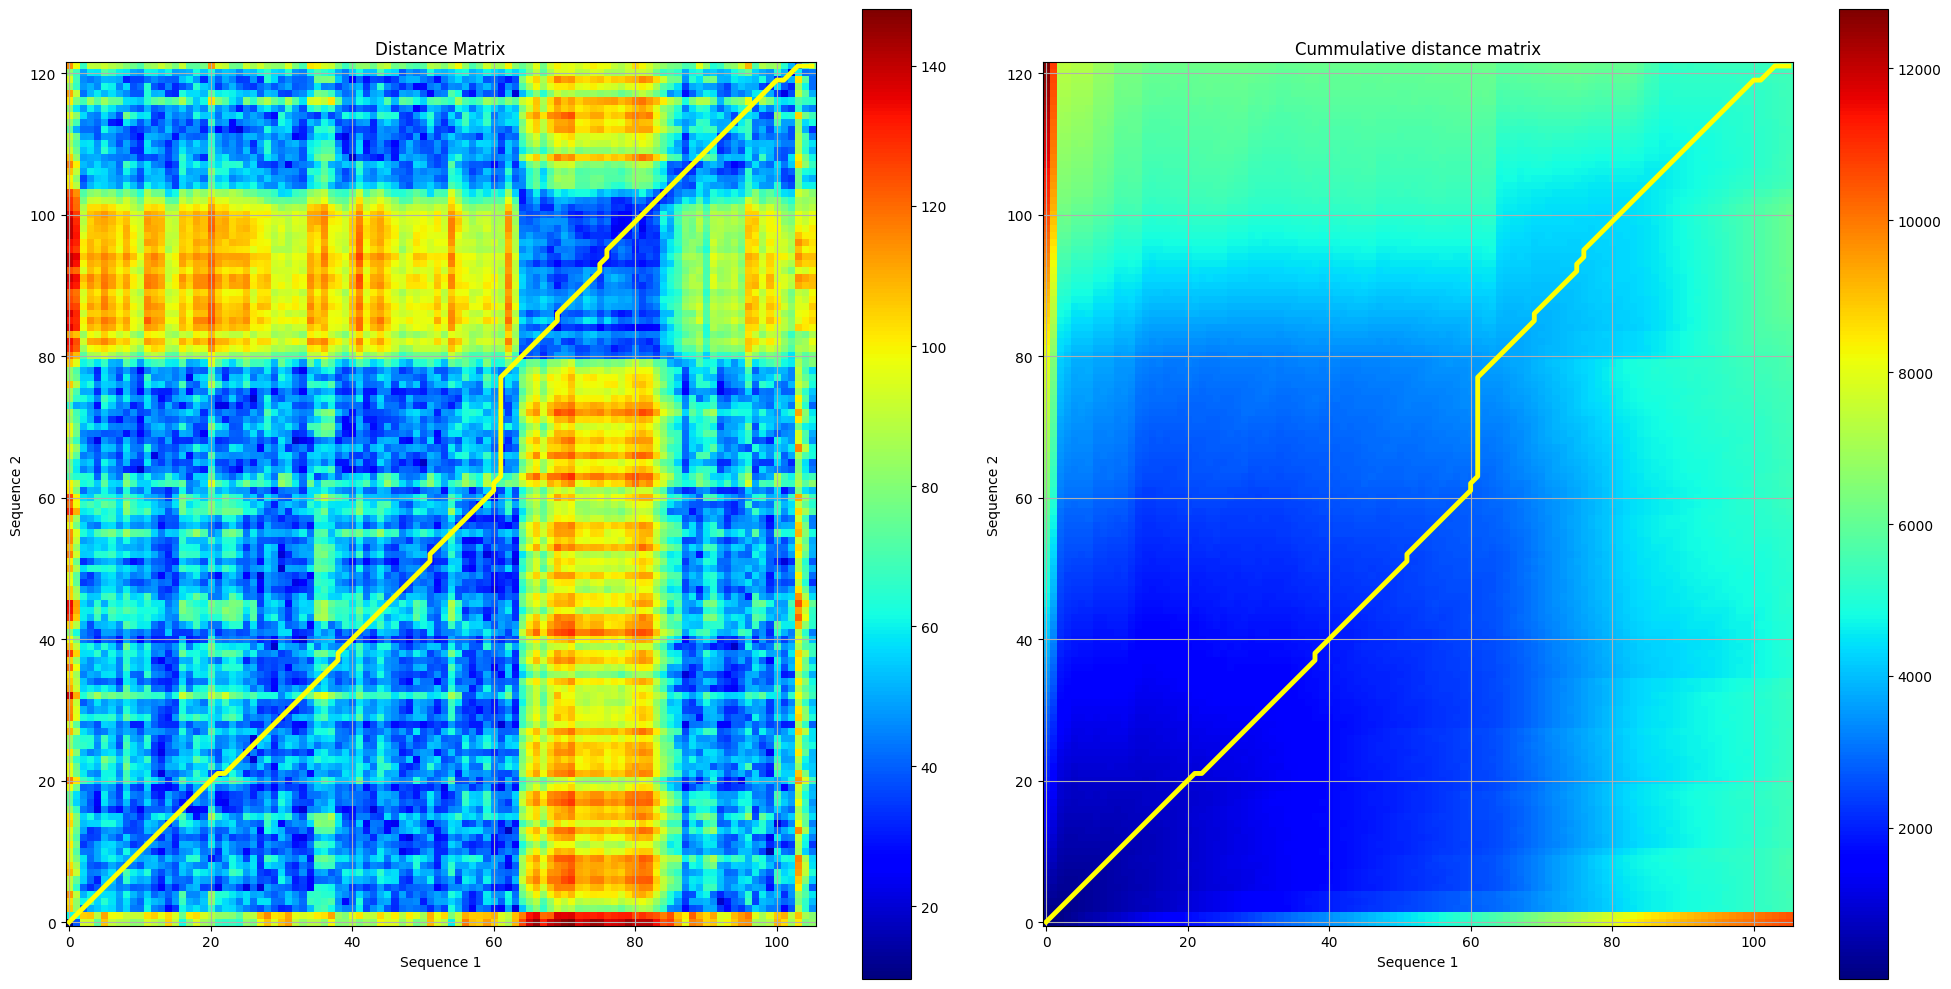

opt distance is : 6128.369398117065


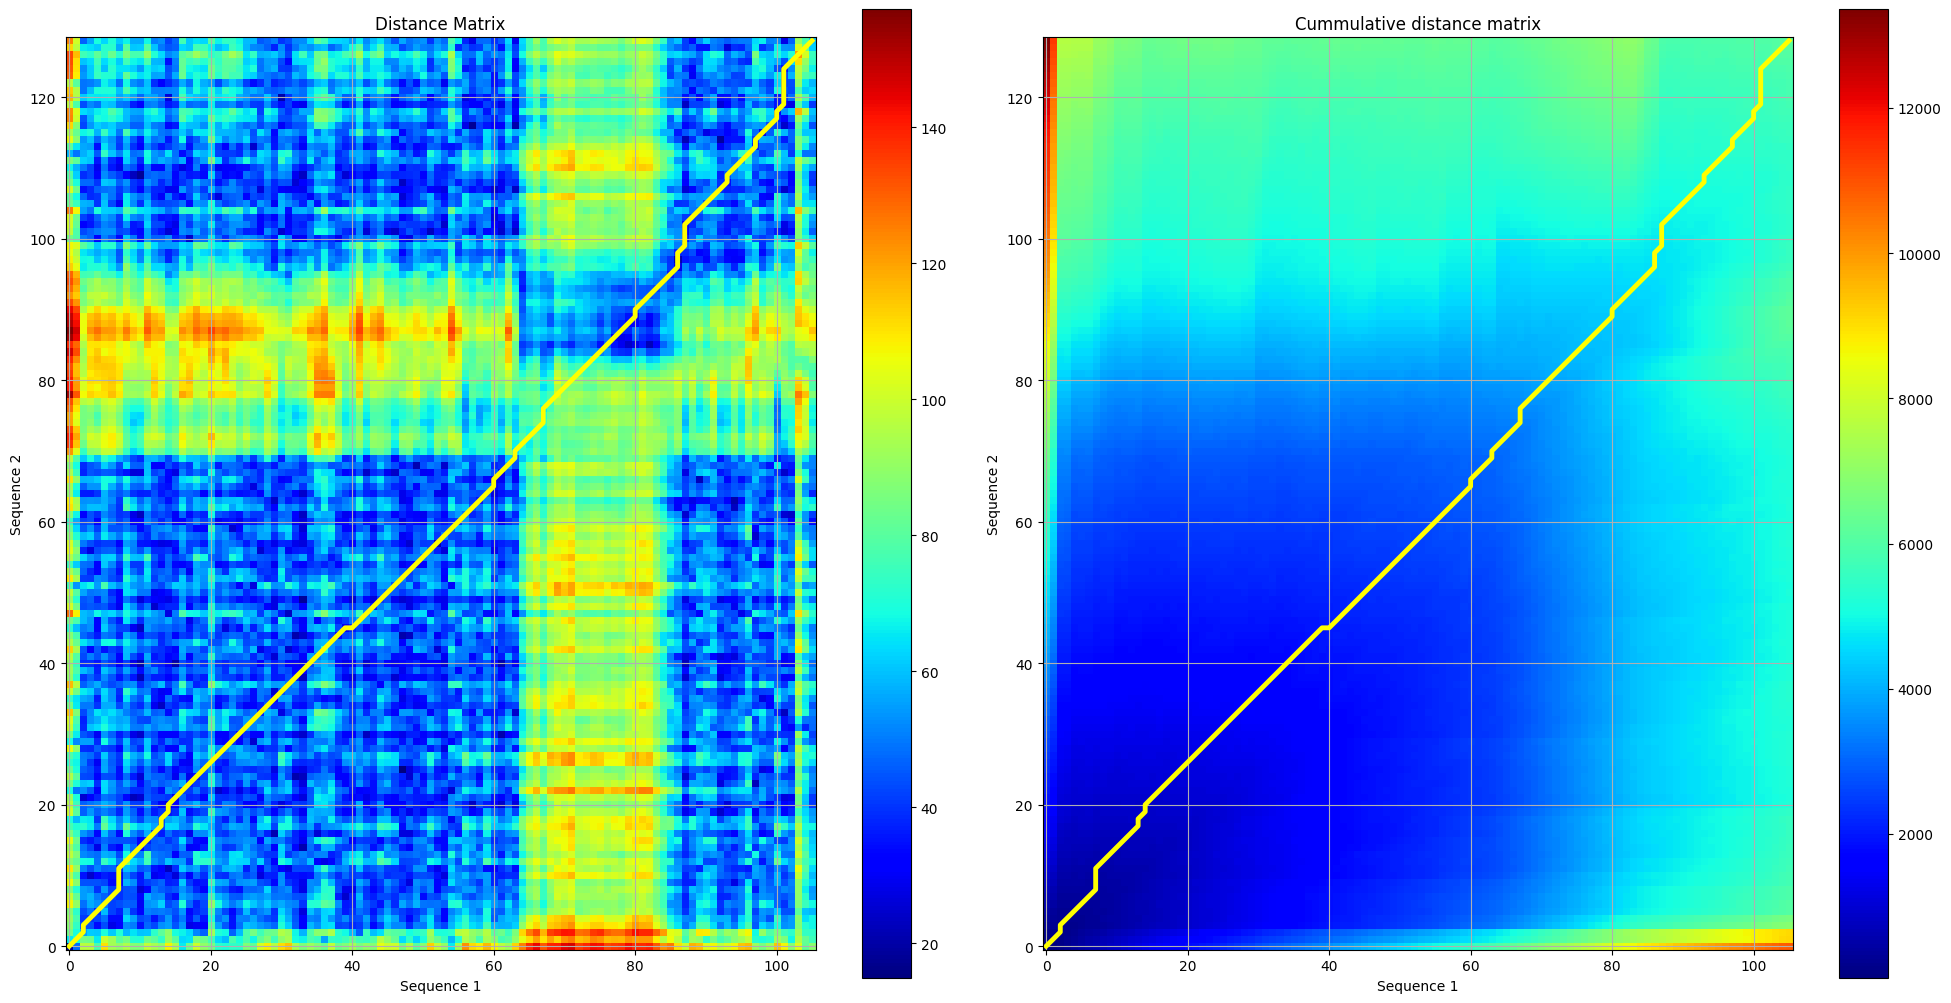

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

#plot of 0,0 and 0,1
print("Plot of of digit 0,0 and 0,1")
plotDTWpath1(Training[0],Testing[0])
plotDTWpath1(Training[0],Testing[3])
print()

#plot of 1,1 and 1,3
print("Plot of of digit 1,1 and 1,3")
plotDTWpath1(Training[1],Testing[3])
plotDTWpath1(Training[1],Testing[11])
print()

#plot of 8,8 and 8,5
print("Plot of of digit 8,8 and 8,1")
plotDTWpath1(Training[8],Testing[24])
plotDTWpath1(Training[8],Testing[15])


**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections


#Accuracy
Accuracy=[]
for i in range(len(Testing)):
  opt_dist=[]
  for k in range(len(Training)):
    opt_distance,path,D,C =vectorDTW(Training[k],Testing[i])
    opt_dist.append(opt_distance)

  index_min = np.argmin(opt_dist)
  value=Train_label[index_min]
  Accuracy.append(value)

Accuracy=np.array(Accuracy)

count=0
for i in range(len(Test_label)):
  if Test_label[i]==Accuracy[i]:
      count=count+1

acc=(count/30)*100
print("accuracy is :",acc)


accuracy is : 76.66666666666667


In [ ]:
#Confusion matrix

confusion_matrix=np.zeros((10,10))

for i in range(len(Accuracy)):
  a=Test_label[i]
  b=Accuracy[i]
  confusion_matrix[a][b]=confusion_matrix[a][b]+1

print(confusion_matrix)

[[3. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 2.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 1.]
 [0. 0. 0. 0. 0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]]


<b> Report your observations </b>

1.The optimal distance of (0,0),(1,1) and (8,8) is less than the optimal distance of (0,1),(1,3) and (8,5).

2.The accuracy is 76.66 %

3.The most confusing digit are 1 and 6.


<dt> <h4> <b> Part (c): </b> In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  </dt> </h4>

[link to TDIGITS data](https://drive.google.com/drive/folders/1oV3jrUiug0-SwWLOdLtbXA6hzqYYIlI7?usp=sharing)


<dt> <h4> 1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy. </dt> </h4>
<dt> <h4> 2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. </dt> </h4>
<dt> <h4> 3. Please report some of the changes to improve the system performance. </dt> </h4>

In [ ]:
from google.colab import drive
import os
import shutil
from IPython.display import Audio, display
import scipy.io.wavfile as wav
!pip -q install python_speech_features
!pip -q install speechpy
from python_speech_features import mfcc
import speechpy


drive.mount('/content/drive',force_remount=True)

#Testing
Testing_q3=[]
Testing_label_q3=[]

#1
datapath = f"/content/drive/MyDrive/Programming_assignment_5/MultiSpeakerDigitData_modified/jackson"
files = os.listdir(datapath)

# Specify the directory in Colab to copy the files to
colab_dir = '/content/'

# Copy audio files to Colab environment
Test_q3=[]
Test_label_q3=[]


for file in files:
  file_path = os.path.join(datapath, file)
  shutil.copy(file_path, colab_dir)
  #print(f"Copied {file} to Colab")
  Test_label_q3.append(int(file[0]))

  (rate,sig) = wav.read(file_path)
  sig=sig-np.mean(sig)
  mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming, nfft=2048)

  #mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
  mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
  Test_q3.append(mfcc_feat_cmvn)
  #display(Audio(file))

Testing_q3.append(Test_q3)
Testing_label_q3.append(Test_label_q3)

#2
datapath = f"/content/drive/MyDrive/Programming_assignment_5/MultiSpeakerDigitData_modified/nicolas"
files = os.listdir(datapath)

# Specify the directory in Colab to copy the files to
colab_dir = '/content/'

# Copy audio files to Colab environment
Test_q3=[]
Test_label_q3=[]


for file in files:
  file_path = os.path.join(datapath, file)
  shutil.copy(file_path, colab_dir)
  #print(f"Copied {file} to Colab")
  Test_label_q3.append(int(file[0]))

  (rate,sig) = wav.read(file_path)
  sig=sig-np.mean(sig)
  mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming, nfft=2048)

  #mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
  mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
  Test_q3.append(mfcc_feat_cmvn)
  #display(Audio(file))

Testing_q3.append(Test_q3)
Testing_label_q3.append(Test_label_q3)

#3
datapath = f"/content/drive/MyDrive/Programming_assignment_5/MultiSpeakerDigitData_modified/theo"
files = os.listdir(datapath)

# Specify the directory in Colab to copy the files to
colab_dir = '/content/'

# Copy audio files to Colab environment
Test_q3=[]
Test_label_q3=[]


for file in files:
  file_path = os.path.join(datapath, file)
  shutil.copy(file_path, colab_dir)
  #print(f"Copied {file} to Colab")
  Test_label_q3.append(int(file[0]))

  (rate,sig) = wav.read(file_path)
  sig=sig-np.mean(sig)
  mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming, nfft=2048)

  #mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
  mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
  Test_q3.append(mfcc_feat_cmvn)
  #display(Audio(file))

Testing_q3.append(Test_q3)
Testing_label_q3.append(Test_label_q3)

#4
datapath = f"/content/drive/MyDrive/Programming_assignment_5/MultiSpeakerDigitData_modified/yweweler"
files = os.listdir(datapath)

# Specify the directory in Colab to copy the files to
colab_dir = '/content/'

# Copy audio files to Colab environment
Test_q3=[]
Test_label_q3=[]


for file in files:
  file_path = os.path.join(datapath, file)
  shutil.copy(file_path, colab_dir)
  #print(f"Copied {file} to Colab")
  Test_label_q3.append(int(file[0]))

  (rate,sig) = wav.read(file_path)
  sig=sig-np.mean(sig)
  mfcc_feat = mfcc(sig, rate, numcep=13, winlen=0.025, winstep=0.01, nfilt=40, lowfreq=20, highfreq=4000, winfunc=np.hamming, nfft=2048)

  #mfcc_feat=mfcc(sig,rate,numcep=13,winlen=0.025,winstep=0.01,nfilt=40,lowfreq=20,highfreq=4000,winfunc=np.hamming)
  mfcc_feat_cmvn=speechpy.processing.cmvnw(mfcc_feat,win_size=301,variance_normalization=False)
  Test_q3.append(mfcc_feat_cmvn)
  #display(Audio(file))

Testing_q3.append(Test_q3)
Testing_label_q3.append(Test_label_q3)


Mounted at /content/drive


In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [ ]:
#Performance evaluation of Isolated digit recognition system on TDIGITS data

#Accuracy
Accuracy_q3=[]
for i in range(len(Testing_q3)):
  a=[]
  for j in range(len(Testing_q3[0])):
    opt_dist=[]
    for k in range(len(Training)):
      opt_distance,path,D,C =vectorDTW(Training[k],Testing_q3[i][j])
      opt_dist.append(opt_distance)

    index_min = np.argmin(opt_dist)
    value=Train_label[index_min]
    a.append(value)
  Accuracy_q3.append(a)

Accuracy_q3=np.array(Accuracy_q3)

count=0
for i in range(len(Testing_label_q3)):
  for j in range(len(Testing_label_q3[0])):
    if Testing_label_q3[i][j]==Accuracy_q3[i][j]:
      count=count+1

acc_q3=(count/2000)*100
print("accuracy of TDIGITS data on the audio recorded by me  :",acc_q3)


accuracy of TDIGITS data on the audio recorded by me  : 13.950000000000001


In [ ]:
#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from the same speaker

#in this we first select first occurence of every digits and then this will be used as reference:

#for jacob
Training_q3_1=[]
for i in range(10):
  index = Testing_label_q3[0].index(i)
  Training_q3_1.append(Testing_q3[0][index])


a=[]
for i in range(len(Testing_q3[0])):
  opt_dist=[]
  for j in range(len(Training_q3_1)):
    opt_distance,path,D,C =vectorDTW(Training_q3_1[j],Testing_q3[0][i])
    opt_dist.append(opt_distance)

  index_min = np.argmin(opt_dist)
  a.append(index_min)


count=0
for j in range(len(Testing_label_q3[0])):
  if Testing_label_q3[0][j]==a[j]:
      count=count+1

acc_q3=(count/500)*100
print("accuracy is of jacob :",acc_q3)

#for nicolas
Training_q3_2=[]
for i in range(10):
  index = Testing_label_q3[1].index(i)
  Training_q3_2.append(Testing_q3[1][index])

a=[]
for i in range(len(Testing_q3[1])):
  opt_dist=[]
  for j in range(len(Training_q3_2)):
    opt_distance,path,D,C =vectorDTW(Training_q3_2[j],Testing_q3[1][i])
    opt_dist.append(opt_distance)

  index_min = np.argmin(opt_dist)
  a.append(index_min)

count=0
for j in range(len(Testing_label_q3[1])):
  if Testing_label_q3[1][j]==a[j]:
      count=count+1

acc_q3=(count/500)*100
print("accuracy is of nicolas :",acc_q3)

#for theo
Training_q3_3=[]
for i in range(10):
  index = Testing_label_q3[2].index(i)
  Training_q3_3.append(Testing_q3[2][index])

a=[]
for i in range(len(Testing_q3[2])):
  opt_dist=[]
  for j in range(len(Training_q3_3)):
    opt_distance,path,D,C =vectorDTW(Training_q3_3[j],Testing_q3[2][i])
    opt_dist.append(opt_distance)

  index_min = np.argmin(opt_dist)
  a.append(index_min)

count=0
for j in range(len(Testing_label_q3[2])):
  if Testing_label_q3[2][j]==a[j]:
      count=count+1

acc_q3=(count/500)*100
print("accuracy is of theo :",acc_q3)

#for yweweler
Training_q3_4=[]
for i in range(10):
  index = Testing_label_q3[3].index(i)
  Training_q3_4.append(Testing_q3[3][index])

a=[]
for i in range(len(Testing_q3[3])):
  opt_dist=[]
  for j in range(len(Training_q3_4)):
    opt_distance,path,D,C =vectorDTW(Training_q3_4[j],Testing_q3[3][i])
    opt_dist.append(opt_distance)

  index_min = np.argmin(opt_dist)
  a.append(index_min)

count=0
for j in range(len(Testing_label_q3[3])):
  if Testing_label_q3[3][j]==a[j]:
      count=count+1

acc_q3=(count/500)*100
print("accuracy is of yweweler :",acc_q3)



accuracy is of jacob : 74.8
accuracy is of nicolas : 59.8
accuracy is of theo : 66.0
accuracy is of yweweler : 65.4


In [ ]:
#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from different speakers

#in this we will consider jacob as training remaing there as testing

#jacob

a=[]
for i in range(len(Testing_q3[1])):
  opt_dist=[]
  for j in range(len(Training_q3_1)):
    opt_distance,path,D,C =vectorDTW(Training_q3_1[j],Testing_q3[1][i])
    opt_dist.append(opt_distance)

  index_min = np.argmin(opt_dist)
  a.append(index_min)

count=0
for j in range(len(Testing_label_q3[1])):
  if Testing_label_q3[1][j]==a[j]:
      count=count+1

acc_q3=(count/500)*100
print("accuracy is of nicolas with jacob as reference :",acc_q3)

a=[]
for i in range(len(Testing_q3[2])):
  opt_dist=[]
  for j in range(len(Training_q3_1)):
    opt_distance,path,D,C =vectorDTW(Training_q3_1[j],Testing_q3[2][i])
    opt_dist.append(opt_distance)

  index_min = np.argmin(opt_dist)
  a.append(index_min)

count=0
for j in range(len(Testing_label_q3[2])):
  if Testing_label_q3[2][j]==a[j]:
      count=count+1

acc_q3=(count/500)*100
print("accuracy is of theo with jacob as reference :",acc_q3)

a=[]
for i in range(len(Testing_q3[3])):
  opt_dist=[]
  for j in range(len(Training_q3_1)):
    opt_distance,path,D,C =vectorDTW(Training_q3_1[j],Testing_q3[3][i])
    opt_dist.append(opt_distance)

  index_min = np.argmin(opt_dist)
  a.append(index_min)

count=0
for j in range(len(Testing_label_q3[3])):
  if Testing_label_q3[3][j]==a[j]:
      count=count+1

acc_q3=(count/500)*100
print("accuracy is of yweweler with jacob as reference :",acc_q3)





accuracy is of nicolas with jacob as reference : 12.0
accuracy is of theo with jacob as reference : 27.800000000000004
accuracy is of yweweler with jacob as reference : 16.8


In [ ]:
#nicolas

a=[]
for i in range(len(Testing_q3[0])):
  opt_dist=[]
  for j in range(len(Training_q3_2)):
    opt_distance,path,D,C =vectorDTW(Training_q3_2[j],Testing_q3[0][i])
    opt_dist.append(opt_distance)

  index_min = np.argmin(opt_dist)
  a.append(index_min)

count=0
for j in range(len(Testing_label_q3[0])):
  if Testing_label_q3[0][j]==a[j]:
      count=count+1

acc_q3=(count/500)*100
print("accuracy is of jacob with nicolas as reference :",acc_q3)

a=[]
for i in range(len(Testing_q3[2])):
  opt_dist=[]
  for j in range(len(Training_q3_2)):
    opt_distance,path,D,C =vectorDTW(Training_q3_2[j],Testing_q3[2][i])
    opt_dist.append(opt_distance)

  index_min = np.argmin(opt_dist)
  a.append(index_min)

count=0
for j in range(len(Testing_label_q3[2])):
  if Testing_label_q3[2][j]==a[j]:
      count=count+1

acc_q3=(count/500)*100
print("accuracy is of theo with nicolas as reference :",acc_q3)

a=[]
for i in range(len(Testing_q3[3])):
  opt_dist=[]
  for j in range(len(Training_q3_2)):
    opt_distance,path,D,C =vectorDTW(Training_q3_2[j],Testing_q3[3][i])
    opt_dist.append(opt_distance)

  index_min = np.argmin(opt_dist)
  a.append(index_min)

count=0
for j in range(len(Testing_label_q3[3])):
  if Testing_label_q3[3][j]==a[j]:
      count=count+1

acc_q3=(count/500)*100
print("accuracy is of yweweler with nicolas as reference :",acc_q3)

accuracy is of jacob with nicolas as reference : 31.4
accuracy is of theo with nicolas as reference : 21.6
accuracy is of yweweler with nicolas as reference : 21.2


In [ ]:
#theo

a=[]
for i in range(len(Testing_q3[0])):
  opt_dist=[]
  for j in range(len(Training_q3_3)):
    opt_distance,path,D,C =vectorDTW(Training_q3_3[j],Testing_q3[0][i])
    opt_dist.append(opt_distance)

  index_min = np.argmin(opt_dist)
  a.append(index_min)

count=0
for j in range(len(Testing_label_q3[0])):
  if Testing_label_q3[0][j]==a[j]:
      count=count+1

acc_q3=(count/500)*100
print("accuracy is of jacob with theo as reference :",acc_q3)

a=[]
for i in range(len(Testing_q3[1])):
  opt_dist=[]
  for j in range(len(Training_q3_3)):
    opt_distance,path,D,C =vectorDTW(Training_q3_3[j],Testing_q3[1][i])
    opt_dist.append(opt_distance)

  index_min = np.argmin(opt_dist)
  a.append(index_min)

count=0
for j in range(len(Testing_label_q3[1])):
  if Testing_label_q3[1][j]==a[j]:
      count=count+1

acc_q3=(count/500)*100
print("accuracy is of nicolas with theo as reference :",acc_q3)

a=[]
for i in range(len(Testing_q3[3])):
  opt_dist=[]
  for j in range(len(Training_q3_1)):
    opt_distance,path,D,C =vectorDTW(Training_q3_3[j],Testing_q3[3][i])
    opt_dist.append(opt_distance)

  index_min = np.argmin(opt_dist)
  a.append(index_min)

count=0
for j in range(len(Testing_label_q3[3])):
  if Testing_label_q3[3][j]==a[j]:
      count=count+1

acc_q3=(count/500)*100
print("accuracy is of yweweler with theo as reference :",acc_q3)

accuracy is of jacob with theo as reference : 49.6
accuracy is of nicolas with theo as reference : 22.400000000000002
accuracy is of yweweler with theo as reference : 27.800000000000004


In [ ]:
#yweweler

a=[]
for i in range(len(Testing_q3[0])):
  opt_dist=[]
  for j in range(len(Training_q3_4)):
    opt_distance,path,D,C =vectorDTW(Training_q3_4[j],Testing_q3[0][i])
    opt_dist.append(opt_distance)

  index_min = np.argmin(opt_dist)
  a.append(index_min)

count=0
for j in range(len(Testing_label_q3[0])):
  if Testing_label_q3[0][j]==a[j]:
      count=count+1

acc_q3=(count/500)*100
print("accuracy is of jacob with yweweler as reference :",acc_q3)

a=[]
for i in range(len(Testing_q3[1])):
  opt_dist=[]
  for j in range(len(Training_q3_4)):
    opt_distance,path,D,C =vectorDTW(Training_q3_4[j],Testing_q3[1][i])
    opt_dist.append(opt_distance)

  index_min = np.argmin(opt_dist)
  a.append(index_min)

count=0
for j in range(len(Testing_label_q3[1])):
  if Testing_label_q3[1][j]==a[j]:
      count=count+1

acc_q3=(count/500)*100
print("accuracy is of nicolas with yweweler as reference :",acc_q3)

a=[]
for i in range(len(Testing_q3[2])):
  opt_dist=[]
  for j in range(len(Training_q3_4)):
    opt_distance,path,D,C =vectorDTW(Training_q3_4[j],Testing_q3[2][i])
    opt_dist.append(opt_distance)

  index_min = np.argmin(opt_dist)
  a.append(index_min)

count=0
for j in range(len(Testing_label_q3[2])):
  if Testing_label_q3[2][j]==a[j]:
      count=count+1

acc_q3=(count/500)*100
print("accuracy is of theo with yweweler as reference :",acc_q3)



accuracy is of jacob with yweweler as reference : 49.6
accuracy is of nicolas with yweweler as reference : 11.799999999999999
accuracy is of theo with yweweler as reference : 24.8


In [ ]:
#Suggest some of the changes to improve the system performance.


<b> Report your observations </b>

1.The accuracy of TDIGITS data on the audio recorded by me is 13.95 %

2.Accuracy of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from the same speaker is

(i).accuracy is of jacob : 74.8  

(ii).accuracy is of nicolas : 59.8

(iii).accuracy is of theo : 66.0

(iv).accuracy is of yweweler : 65.4

3.The accuracy of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from different speakers

(i)Jacob as reference

1.accuracy is of nicolas with jacob as reference : 12.0

2.accuracy is of theo with jacob as reference : 27.80

3.accuracy is of yweweler with jacob as reference : 16.8

(ii)Nicolas as reference

1.accuracy is of jacob with nicolas as reference : 31.4

2.accuracy is of theo with nicolas as reference : 21.6

3.accuracy is of yweweler with nicolas as reference : 21.2

(iii)Theo as reference

1.accuracy is of jacob with theo as reference : 49.6

2.accuracy is of nicolas with theo as reference : 22.40

3.accuracy is of yweweler with theo as reference : 27.80

(iv)Ywewler as reference

1.accuracy is of jacob with yweweler as reference : 49.6

2.accuracy is of nicolas with yweweler as reference : 11.79

3.accuracy is of theo with yweweler as reference : 24.8

